In [1]:
# 导入模块
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

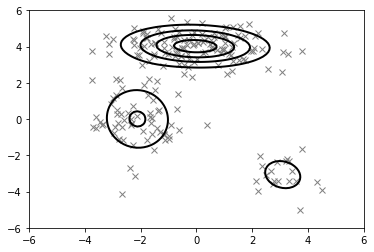

In [2]:
# 构建测试数据
N = 200; pi1 = np.array([0.6, 0.3, 0.1])
mu1 = np.array([[0,4], [-2,0], [3,-3]])
sigma1 = np.array([[[3,0],[0,0.5]], [[1,0],[0,2]], [[.5,0],[0,.5]]])
gen = [np.random.multivariate_normal(mu, sigma, int(pi*N)) for mu, sigma, pi in zip(mu1, sigma1, pi1)]
X = np.concatenate(gen)

# 初始化: mu, sigma, pi = 均值, 协方差矩阵, 混合系数
theta = {}; param = {}
theta['pi'] = [1/3, 1/3, 1/3]            # 均匀初始化
theta['mu'] = np.random.random((3, 2))   # 随机初始化
theta['sigma'] = np.array([np.eye(2)]*3) # 初始化为单位正定矩阵
param['k'] = len(pi1); param['N'] = X.shape[0]; param['dim'] = X.shape[1]
# 定义函数
def GMM_component(X, theta, c):
    '''
    由联合正态分布计算GMM的单个成员
    '''
    return theta['pi'][c]*multivariate_normal(theta['mu'][c], theta['sigma'][c, ...]).pdf(X)
 
def E_step(theta, param):
    '''
    E步：更新隐变量概率分布q(Z)。
    '''
    q = np.zeros((param['k'], param['N']))
    for i in range(param['k']):
        q[i, :] = GMM_component(X, theta, i)
    q /= q.sum(axis=0)
    return q
 
def M_step(X, q, theta, param):
    '''
    M步：使用q(Z)更新GMM参数。
    '''
    pi_temp = q.sum(axis=1); pi_temp /= param['N'] # 计算pi
    mu_temp = q.dot(X); mu_temp /= q.sum(axis=1)[:, None] # 计算mu
    sigma_temp = np.zeros((param['k'], param['dim'], param['dim']))
    for i in range(param['k']):
        ys = X - mu_temp[i, :]
        sigma_temp[i] = np.sum(q[i, :, None, None]*np.matmul(ys[..., None], ys[:, None, :]), axis=0)
    sigma_temp /= np.sum(q, axis=1)[:, None, None] # 计算sigma
    theta['pi'] = pi_temp; theta['mu'] = mu_temp; theta['sigma'] = sigma_temp
    return theta
 
def likelihood(X, theta):
    '''
    计算GMM的对数似然。
    '''
    ll = 0
    for i in range(param['k']):
        ll += GMM_component(X, theta, i)
    ll = np.log(ll).sum()
    return ll
 
def EM_GMM(X, theta, param, eps=1e-5, max_iter=1000):
    '''
    高斯混合模型的EM算法求解
        theta: GMM模型参数; param: 其它系数; eps: 计算精度; max_iter: 最大迭代次数
        返回对数似然和参数theta，theta是包含pi、mu、sigma的Python字典
    '''
    for i in range(max_iter):
        ll_old = 0
        # E-step
        q = E_step(theta, param)
        # M-step
        theta = M_step(X, q, theta, param)
        ll_new = likelihood(X, theta)
        if np.abs(ll_new - ll_old) < eps:
            break;
        else:
            ll_old = ll_new
    return ll_new, theta
# EM算法求解GMM，最大迭代次数为1e5
ll, theta2 = EM_GMM(X, theta, param, max_iter=10000)
# 由theta计算联合正态分布的概率密度
L = 100; Xlim = [-6, 6]; Ylim = [-6, 6]
XGrid, YGrid = np.meshgrid(np.linspace(Xlim[0], Xlim[1], L), np.linspace(Ylim[0], Ylim[1], L))
Xout = np.vstack([XGrid.ravel(), YGrid.ravel()]).T
MVN = np.zeros(L*L)
for i in range(param['k']):
    MVN += GMM_component(Xout, theta, i)
MVN = MVN.reshape((L, L))
# 绘制结果
plt.plot(X[:, 0], X[:, 1], 'x', c='gray', zorder=1)
plt.contour(XGrid, YGrid, MVN, 5, colors=('k',), linewidths=(2,))

In [11]:
import numpy as np
theta = {}; param = {}
param['k'] = 2; param['N'] = 10; param['dim'] = 3
theta['pi'] = np.ones(param['k'])/param['k']                 # 均匀初始化
theta['mu'] = np.random.random((param['k'],param['dim']))    # 随机初始化
theta['sigma'] = np.array([np.eye(param['dim'])]*param['k']) # 初始化为单位正定矩阵
print(theta['pi'])
print(theta['mu'])
print(theta['sigma'])

[0.5 0.5]
[[0.92841281 0.64225437 0.03061031]
 [0.24594374 0.74976645 0.60412782]]
[[[1. 0. 0.]
  [0. 1. 0.]
  [0. 0. 1.]]

 [[1. 0. 0.]
  [0. 1. 0.]
  [0. 0. 1.]]]


In [ ]:
# 初始化: mu, sigma, pi = 均值, 协方差矩阵, 混合系数
import numpy as np
theta = {}; param = {}
param['k'] = 2; param['N'] = 10; param['dim'] = 3
theta['pi'] = np.ones(param['k'])/param['k']                 # 均匀初始化
theta['mu'] = np.random.random((param['k'],param['dim']))    # 随机初始化
theta['sigma'] = np.array([np.eye(param['dim'])]*param['k']) # 初始化为单位正定矩阵


# 定义函数
def GMM_component(X, theta, c):#由联合正态分布计算GMM的单个成员
    return theta['pi'][c]*multivariate_normal(theta['mu'][c], theta['sigma'][c, ...]).pdf(X)
 
def E_step(theta, param):#E步：更新隐变量概率分布q(Z)。
    q = np.zeros((param['k'], param['N']))
    for i in range(param['k']):
        q[i, :] = GMM_component(X, theta, i)
    q /= q.sum(axis=0)
    return q
 
def M_step(X, q, theta, param):#M步：使用q(Z)更新GMM参数。
    pi_temp = q.sum(axis=1); pi_temp /= param['N'] # 计算pi
    mu_temp = q.dot(X); mu_temp /= q.sum(axis=1)[:, None] # 计算mu
    sigma_temp = np.zeros((param['k'], param['dim'], param['dim']))
    for i in range(param['k']):
        ys = X - mu_temp[i, :]
        sigma_temp[i] = np.sum(q[i, :, None, None]*np.matmul(ys[..., None], ys[:, None, :]), axis=0)
    sigma_temp /= np.sum(q, axis=1)[:, None, None] # 计算sigma
    theta['pi'] = pi_temp; theta['mu'] = mu_temp; theta['sigma'] = sigma_temp
    return theta
 
def likelihood(X, theta):#计算GMM的对数似然。
    ll = 0
    for i in range(param['k']):
        ll += GMM_component(X, theta, i)
    ll = np.log(ll).sum()
    return ll
 
def EM_GMM(X, theta, param, eps=1e-5, max_iter=1000):
    '''
    高斯混合模型的EM算法求解
        theta: GMM模型参数; param: 其它系数; eps: 计算精度; max_iter: 最大迭代次数
        返回对数似然和参数theta，theta是包含pi、mu、sigma的Python字典
    '''
    for i in range(max_iter):
        ll_old = 0
        # E-step
        q = E_step(theta, param)
        # M-step
        theta = M_step(X, q, theta, param)
        ll_new = likelihood(X, theta)
        if np.abs(ll_new - ll_old) < eps:
            break;
        else:
            ll_old = ll_new
    return ll_new, theta
# EM算法求解GMM，最大迭代次数为1e5
ll, theta2 = EM_GMM(X, theta, param, max_iter=10000)
# 由theta计算联合正态分布的概率密度
L = 100; Xlim = [-6, 6]; Ylim = [-6, 6]
XGrid, YGrid = np.meshgrid(np.linspace(Xlim[0], Xlim[1], L), np.linspace(Ylim[0], Ylim[1], L))
Xout = np.vstack([XGrid.ravel(), YGrid.ravel()]).T
MVN = np.zeros(L*L)
for i in range(param['k']):
    MVN += GMM_component(Xout, theta, i)
MVN = MVN.reshape((L, L))
# 绘制结果
plt.plot(X[:, 0], X[:, 1], 'x', c='gray', zorder=1)
plt.contour(XGrid, YGrid, MVN, 5, colors=('k',), linewidths=(2,))